In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
df = pd.read_csv('Vignesh/Dataset/plant_vase1(2).CSV')
df.head()

,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4,irrgation
0,2020,3,6,22,16,11,0.33,0.40,0.36,0.23,0.02,False
1,2020,3,6,22,17,11,0.32,0.39,0.35,0.23,0.02,False
2,2020,3,6,22,18,11,0.31,0.39,0.34,0.22,0.02,False
3,2020,3,6,22,19,11,0.30,0.38,0.33,0.21,0.02,False
4,2020,3,6,22,20,11,0.29,0.38,0.33,0.21,0.02,False


In [3]:
df.isnull().sum()

year         0
month        0
day          0
hour         0
minute       0
second       0
moisture0    0
moisture1    0
moisture2    0
moisture3    0
moisture4    0
irrgation    0
dtype: int64

In [4]:
df["year"].value_counts()

year
2020    4409
Name: count, dtype: int64

In [5]:
df["month"].value_counts()

month
3    4409
Name: count, dtype: int64

In [6]:
df["irrgation"].value_counts()

irrgation
False    4409
Name: count, dtype: int64

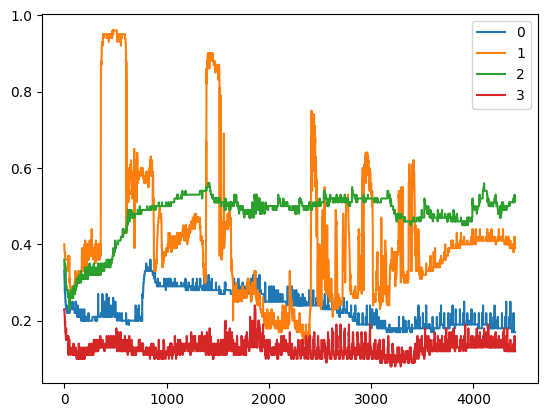

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
plt.plot(df["moisture0"])
plt.plot(df["moisture1"])
plt.plot(df["moisture2"])
plt.plot(df["moisture3"])
plt.legend(["0", "1", "2", "3"])
plt.show()

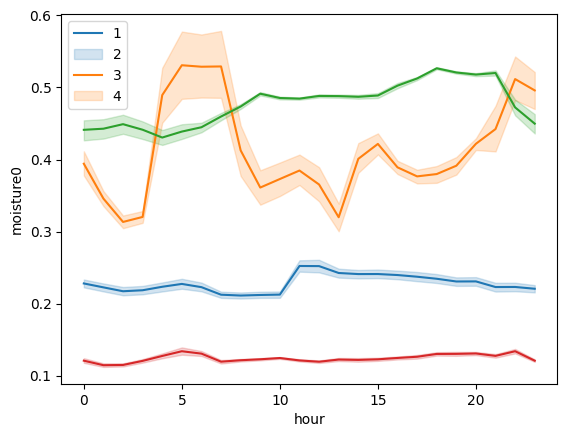

In [8]:
plt.figure()
sns.lineplot(data=df, x="hour", y="moisture0")
sns.lineplot(data=df, x="hour", y="moisture1")
sns.lineplot(data=df, x="hour", y="moisture2")
sns.lineplot(data=df, x="hour", y="moisture3")
plt.legend(["1", "2", "3", "4"])
plt.show()

In [9]:
X = df.drop("moisture4", axis=1)
y = df["moisture4"]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearnex import patch_sklearn
patch_sklearn()

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
R2_res=r2_score(y_test, y_pred)
print("R2_score =",R2_res)

R2_score = 0.48728925586301797


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
